# The Sparks Foundation - GRIP - Data Science and Business Analytics - FEB'2022

## TASK 1 : Prediction using supervised ML

### Author : EDA HARSHITH

### Dataset used : Student Scores

It can be downloaded through the following link: http://bit.ly/w-data

### Problem Statements :

1. Predict the percentage of a student based on the no of study hours?

2. What will be predicted score if a student studies for 9.25 hrs/ day?

### Import necessary libraries

In [3]:
import numpy as np       
import pandas as pd                
import seaborn as sns              
import matplotlib.pyplot as plt
%matplotlib inline               

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,classification_report,mean_absolute_error,mean_squared_error

### Reading data from given link

In [6]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Given Data")
dataset.head(10)

Given Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
print(dataset.shape) #shows the shape of the data

(25, 2)


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize The Data

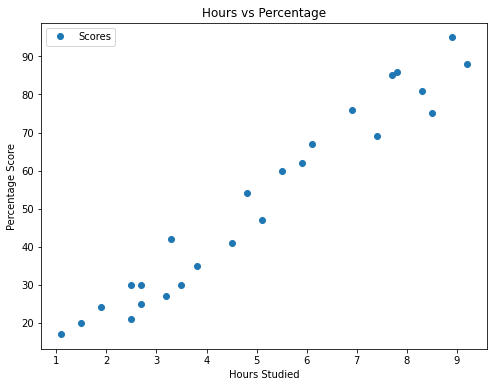

In [12]:
dataset.plot(x='Hours', y='Scores', style='o',figsize=(8,6))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() #plot the data

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

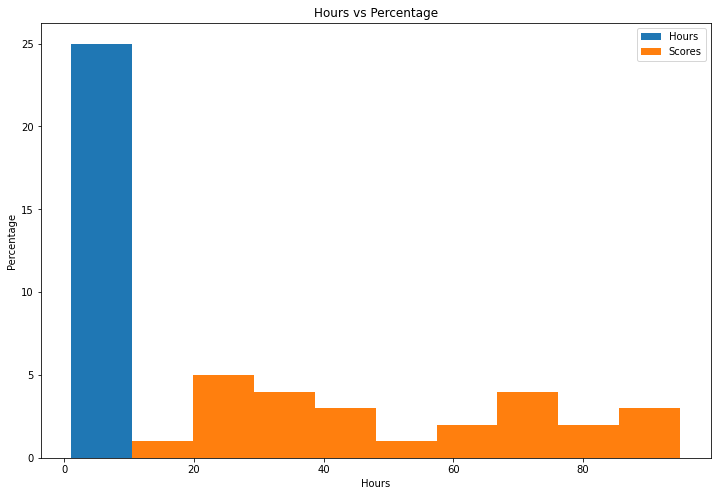

In [29]:
dataset.plot(kind='hist',figsize=(12,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [30]:
dataset.corr(method='pearson') #checking correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
dataset.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


From above we can see there is positive correlation ,which is about 0.971 which is similar to 1 and thus is a good value to apply linear regression on our data.

### Preparing data for training

In [16]:
#collecting all columns  before last
X = dataset.iloc[:, :-1].values
#collecting last column
y = dataset.iloc[:, 1].values  
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

### Splitting data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training Using Linear Regression

In [31]:
reg= LinearRegression()  
lr_model=reg.fit(X_train, y_train) 

### Checking Accuracy Scores

In [32]:
print("Accuracy Test:",lr_model.score(X_train,y_train))

print("Accuracy Test",lr_model.score(X_test,y_test))

Accuracy Test: 0.9515510725211552
Accuracy Test 0.9454906892105354


slope of regression line: [9.91065648]
intercept pf regression line: 2.018160041434662


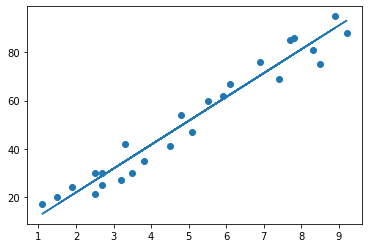

In [33]:
print("slope of regression line:",lr_model.coef_)
print("intercept pf regression line:" ,lr_model.intercept_)
line = reg.coef_*X+reg.intercept_
# Plotting the regression line
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [21]:
print(X_test)                # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting scores for a student studying 9.25hrs/day

In [34]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("If a Student Studies for {}  Hours per day,he/she will score {} % in exam.".format(hours,own_pred))

If a Student Studies for 9.25  Hours per day,he/she will score [93.69173249] % in exam.


Thus from our model we predict that for 9.25 hrs/day study by any student it has high chance of getting 93.69% marks in exam.

### Model Evaluation

In [35]:
# Evaluating mean absolute error,r_score and root mean squared error
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 

print('R_Score:',
      r2_score(y_test, y_pred))

print('Root mean Squared error:', 
      np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
R_Score: 0.9454906892105354
Root mean Squared error: 4.647447612100373


### Here R_score value is approx. 0.94 which is quite decent value which means our model is predicting with 94.5% accuracy and also have relatively less mean absolute error.